# Workshop 6: Graph Introduction

COSC2671 Social Media and Network Analytics

Jeffrey Chan, RMIT University, 2022

In [27]:
%load_ext autoreload
%autoreload 1
%aimport twitterClient

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# time is used for timer to ask Twitter to sleep, to avoid changes of hitting rate limits
import time

from tweepy import Cursor
from tweepy import TweepyException
from twitterClient import twitterClient


## Egonet Construction

Construct an egonet of Twitter accounts that the user follows.

In [29]:
# construct twitter client
client = twitterClient()

In [30]:
# common parameters

# name of ego (yourself)
sEgoId = client.get_user(username="RMIT").data.id
sEgoName = client.get_user(username="RMIT").data.username
# maximum number of results
maxResults = 300

Retrieve followers of the ego and build network.

TODO: You'll need to add code here.

In [31]:
import math
# TODO: Remember to import networkx
import networkx as nx

# TODO: Construct initial graph object
# construct directed graph
egoGraph = nx.DiGraph()
egoGraph.add_node(sEgoName)
# egoGraph.add_node(‘B’, followerCount=10)
# egoGraph.add_edge(‘A’, ‘B’)


# user fields to retrieve (modify if want other fields to retrieve)
lUserFields = ["id","name","public_metrics"]


#
# Retrive followers of the ego
#
twitterResponse = client.get_users_followers(id=sEgoId, max_results=maxResults, pagination_token=None, tweet_fields=None, user_fields=lUserFields, user_auth=False)
# loop through the results from first page

def calculate_color(followers):
    if followers <= 0:
        followers = 1
    return math.ceil(math.log10(followers))

for user in twitterResponse.data:
    sFollowerName = user.username
    followers_count = user.public_metrics.get('followers_count')
    following_count = user.public_metrics.get('following_count')
    tweet_count = user.public_metrics.get('tweet_count')
    egoGraph.add_node(sFollowerName, followers_count=followers_count, following_count=following_count, tweet_count=tweet_count, color_id=calculate_color(followers_count))
    egoGraph.add_edge(sEgoName, sFollowerName)


# keep looping through each page of results until there are none left (AttributeError will be thrown)
while True:
    try:
        twitterResponse = client.get_users_followers(id=sEgoId, max_results=300, pagination_token=twitterResponse.next_token, tweet_fields=None, user_fields=lUserFields, user_auth=False)
    except AttributeError:
        break
        
    # process each subsequent page of followers
    for user in twitterResponse.data:
        sFollowerName = user.username
        followers_count = user.public_metrics.get('followers_count')
        following_count = user.public_metrics.get('following_count')
        tweet_count = user.public_metrics.get('tweet_count')
        egoGraph.add_node(sFollowerName, followers_count=followers_count, following_count=following_count, tweet_count=tweet_count, color_id=calculate_color(followers_count))
        egoGraph.add_edge(sEgoName, sFollowerName)




Retrieve users that the ego follows and add to network.

TODO: You'll need to add code here.

In [32]:
# user fields to retrieve (modify if want other fields to retrieve)
lUserFields = ["id","name","public_metrics"]

#
# Retrive followed (people who follows the ego user)
#
twitterResponse = client.get_users_following(id=sEgoId, max_results=maxResults, pagination_token=None, tweet_fields=None, user_fields=lUserFields, user_auth=False)
# loop through the results from first page
for user in twitterResponse.data:
    sFollowedName = user.username
    followers_count = user.public_metrics.get('followers_count')
    following_count = user.public_metrics.get('following_count')
    tweet_count = user.public_metrics.get('tweet_count')
    egoGraph.add_node(sFollowedName, followers_count=followers_count, following_count=following_count, tweet_count=tweet_count, color_id=calculate_color(followers_count))
    egoGraph.add_edge(sFollowedName, sEgoName)


# keep looping through each page of results until there are none left (AttributeError will be thrown)
while True:
    try:
        twitterResponse = client.get_users_following(id=sEgoId, max_results=300, pagination_token=twitterResponse.next_token, tweet_fields=None, user_fields=lUserFields, user_auth=False)
    except AttributeError:
        break
        
    # process each page of followers
    for user in twitterResponse.data:
        sFollowedName = user.username
        followers_count = user.public_metrics.get('followers_count')
        following_count = user.public_metrics.get('following_count')
        tweet_count = user.public_metrics.get('tweet_count')
        egoGraph.add_node(sFollowedName, followers_count=followers_count, following_count=following_count, tweet_count=tweet_count, color_id=calculate_color(followers_count))
        egoGraph.add_edge(sFollowedName, sEgoName)

        

## Analyse the constructed Ego net

TODO: You'll need to add code here.

In [33]:

#
# Analyse graph
#

# graph file name, rename to appropriate filename
graphFile='ego.graphml'


# TODO: for you to complete!
#



## Visualise the Ego net

TODO: You'll need to add code here.

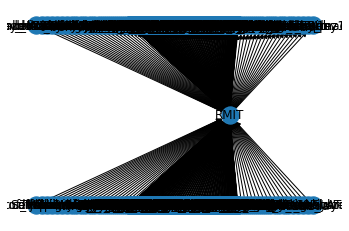

In [34]:
#
# Draw graph
#

# TODO: Remember to import matplotlib.pyplot
from matplotlib import pyplot as plt
from matplotlib.patches import ArrowStyle

# TODO: for you to complete!
# use networkx to draw
nx.draw_networkx(egoGraph, arrows=True, with_labels=True,
                 pos=nx.kamada_kawai_layout(egoGraph, scale=10))
plt.axis('off')
plt.show()

In [36]:
with open(graphFile, 'wb') as fOut:
    nx.write_graphml(egoGraph, fOut)